In [83]:
from keras.models import Sequential
from keras.layers import Conv3D, ConvLSTM2D, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import glob
import json
    

In [132]:
seq = Sequential()

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), 
                   input_shape=(None, 200, 200, 2),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True)),
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_8 (ConvLSTM2D)  (None, None, 200, 200, 4  60640     
                             0)                                  
                                                                 
 batch_normalization_8 (Batc  (None, None, 200, 200, 4  160      
 hNormalization)             0)                                  
                                                                 
 conv_lstm2d_9 (ConvLSTM2D)  (None, None, 200, 200, 4  115360    
                             0)                                  
                                                                 
 batch_normalization_9 (Batc  (None, None, 200, 200, 4  160      
 hNormalization)             0)                                  
                                                                 
 conv_lstm2d_10 (ConvLSTM2D)  (None, None, 200, 200, 4

In [118]:
def load_npy(folder): # used for MOD14A2, MOD13Q1
    mod14 = folder + '/MOD14A2*.npy'
    mod13 = folder + '/MOD13Q1*.npy'
    mod14g = glob.glob(mod14)
    mod13g = glob.glob(mod13)
    
    length = min(len(mod14g), len(mod13g))
    if length < 10:
        return
    res = np.zeros(shape=(1, length, 200, 200, 2))
    for i in range(length):
        arr14 = np.load(mod14g[i])
        arr13 = np.load(mod13g[i])
        if (arr14.shape != (200, 200)) or (arr13.shape != (200, 200)):
            return
        arr14 = arr14[np.newaxis, np.newaxis, :, :]
        arr13 = arr13[np.newaxis, np.newaxis, :, :]
        res[:, i, :, :, 0] = arr14
        res[:, i, :, :, 1] = arr13

    print(res.shape)
    return res

In [129]:
path = '/home/fun/wildfire_data/*'
files = glob.glob(path)

data = np.zeros(shape=(1, 10, 200, 200, 2))

for file in files:
    prof = file + '/profile.json'
    try:
        f = open(prof)
        info = json.load(f)
        if info['info']['acres_burned'] >= 100:
            arr = load_npy(file) # many fires (~30) do not have an acres_burned value, instead it is an empty string "".
                                 # these fires are minor and only last around 1 or 2 months.
                                 # for now, doing a try except to get around this is good enough.
            arr = arr[:, -10:, :, :, :]
            data = np.append(data, arr, axis=0)
    except:
        continue

arr = np.delete(arr, 0, axis=0)
print("FINAL SHAPE:", data.shape)


(1, 13, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 12, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 13, 200, 200, 2)
(1, 10, 200, 200, 2)
(1, 12, 200, 

AxisError: axis 0 is out of bounds for array of dimension 0

In [131]:
arr.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [67]:
seq.fit(data[:, :3], # timestamps during wildfire
        data[:, 3:], # predictions (timestamps to predict)
        batch_size=1,
        epochs=10,
        validation_split=0.20, 
       )

Epoch 1/10
1/1 [==============================] - 20s 20s/step - loss: -31.3071 - val_loss: -86.6745
Epoch 2/10
1/1 [==============================] - 16s 16s/step - loss: -34.3167 - val_loss: -88.2349
Epoch 3/10
1/1 [==============================] - 16s 16s/step - loss: -37.3284 - val_loss: -89.7950
Epoch 4/10
1/1 [==============================] - 16s 16s/step - loss: -40.2289 - val_loss: -91.3556
Epoch 5/10
1/1 [==============================] - 15s 15s/step - loss: -43.0823 - val_loss: -92.9147
Epoch 6/10
1/1 [==============================] - 16s 16s/step - loss: -45.9259 - val_loss: -94.4742
Epoch 7/10
1/1 [==============================] - 17s 17s/step - loss: -48.7150 - val_loss: -96.0352
Epoch 8/10
1/1 [==============================] - 16s 16s/step - loss: -51.5810 - val_loss: -97.5976
Epoch 9/10
1/1 [==============================] - 16s 16s/step - loss: -54.3945 - val_loss: -99.1614
Epoch 10/10
1/1 [==============================] - 15s 15s/step - loss: -57.2212 - val_loss

In [75]:
steps = 5

track = data[3][:steps, :, :, :]
print(track.shape)
for j in range(9-steps):
    new_pos = seq.predict(track[np.newaxis, :, :, :, :])
    new = new_pos[:, -1, :, :, :]
    track = np.concatenate((track, new), axis=0) # adds +1 to the first dimension in each loop cycle"

(5, 200, 200, 1)
1/1 [==============================] - 2s 2s/step


(9, 200, 200, 1)


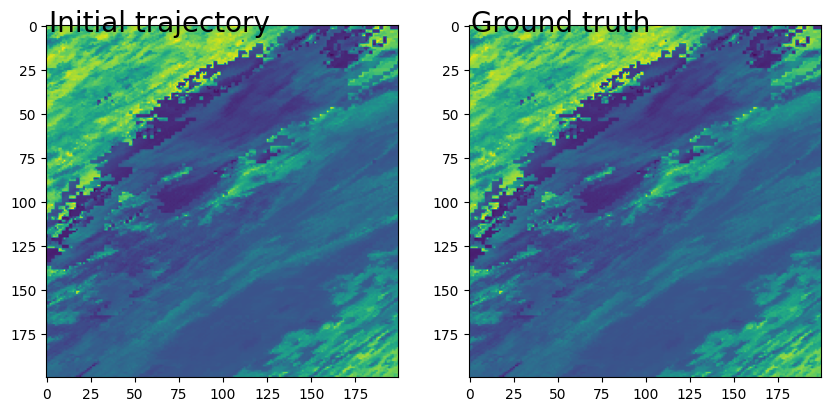

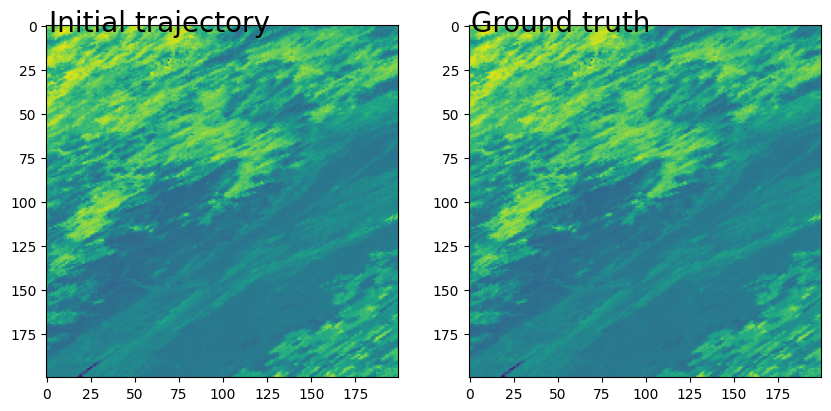

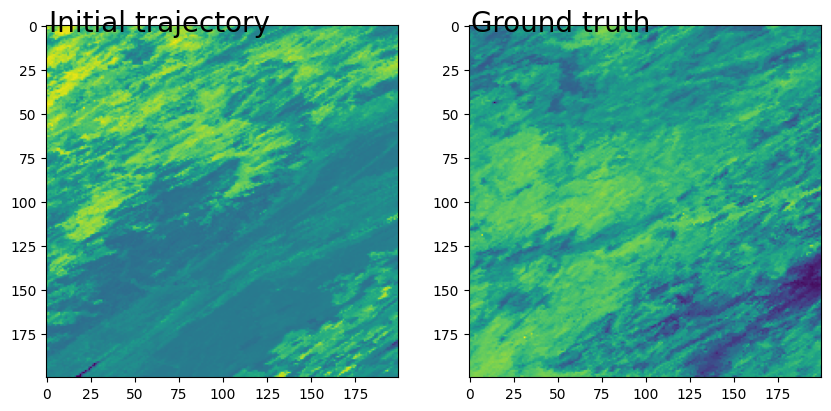

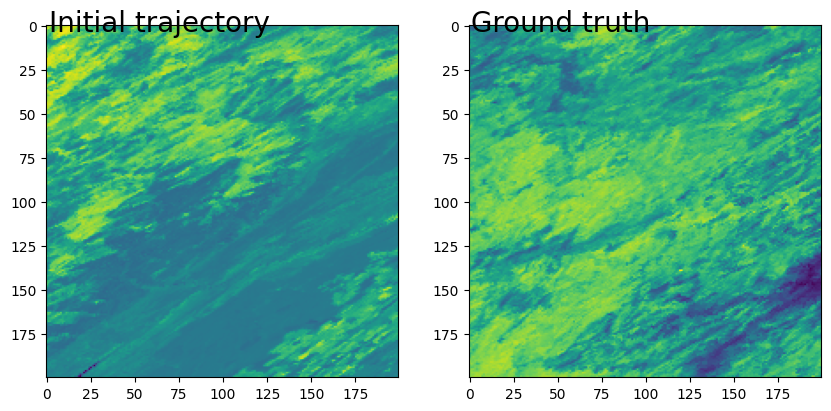

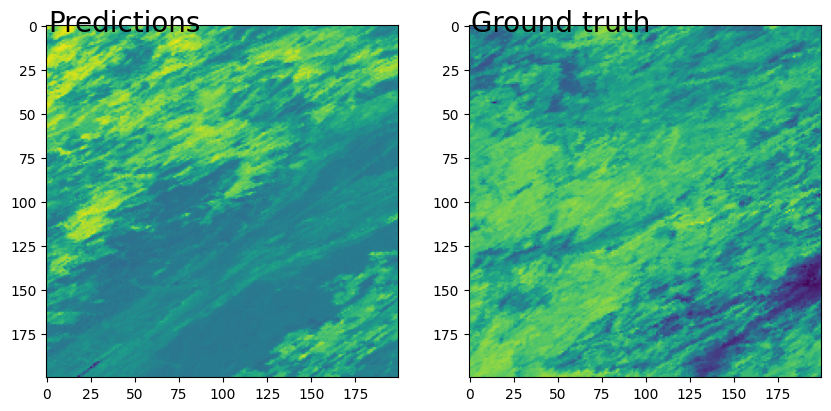

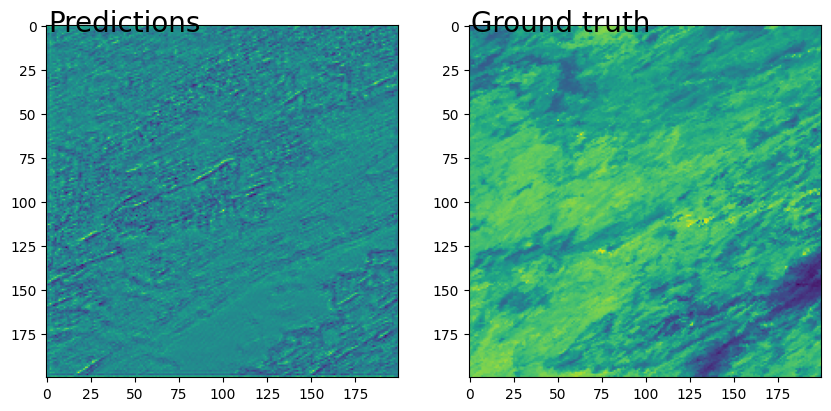

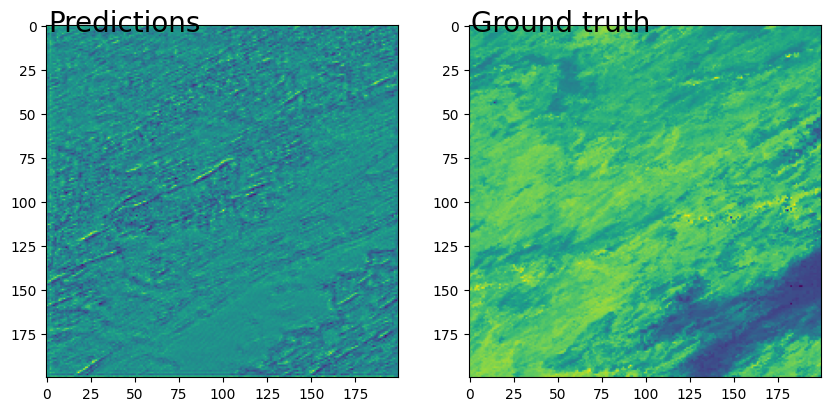

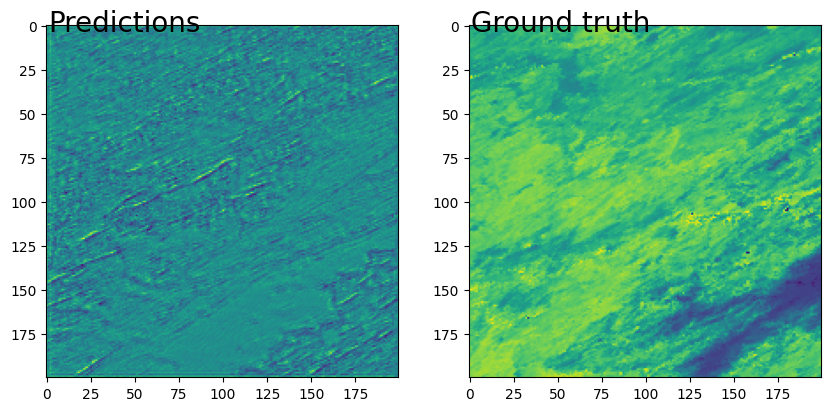

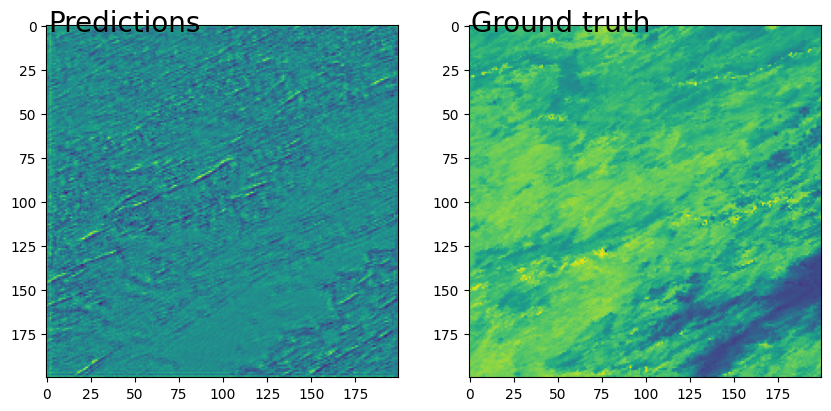

In [77]:
track2 = data[3][:, :, :, :]
print(track2.shape)

for i in range(len(track2)):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 4:
        ax.text(1, 3, 'Prediction', fontsize=20)
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, :, :, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, :, :, 0]
    if i >= 2:
        toplot = data[2][i - 1, :, :, 0]
    plt.imshow(toplot)

In [ ]:
# Kincade_Fire_2019-10-23
# Warner_Mountain_Lightning_2017-07-23
# Soberanes_Fire_2016-07-22
# Butte_Fire_2015-09-09
# Thomas_Fire_2017-12-04
# Ranch_Fire_Mendocino_Complex_2018-07-27
# Sand_Fire_2014-07-25